In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


******************** Data Preprocessing***************************

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("/content/drive/MyDrive/MLProjects/FinalProject/housing.csv")
df
## drop NAN entries
df.dropna(inplace=True)
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
train_data = X_train.join(y_train)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
428,-122.28,37.88,52.0,2495.0,491.0,1058.0,464.0,4.1429,NEAR BAY,259600.0
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,<1H OCEAN,366300.0
14354,-117.23,32.75,23.0,2415.0,653.0,1275.0,596.0,3.1389,NEAR OCEAN,101800.0
16543,-121.23,37.79,23.0,1985.0,424.0,1198.0,389.0,2.7734,INLAND,116800.0
19555,-121.01,37.61,5.0,3655.0,696.0,2316.0,647.0,3.4703,INLAND,129300.0
...,...,...,...,...,...,...,...,...,...,...
4483,-118.19,34.06,47.0,2324.0,658.0,3020.0,594.0,1.1868,<1H OCEAN,93800.0
7012,-118.07,33.96,30.0,928.0,230.0,913.0,214.0,2.6991,<1H OCEAN,147100.0
4401,-118.28,34.08,40.0,1630.0,543.0,1568.0,510.0,2.7366,<1H OCEAN,169100.0
11793,-121.19,38.85,8.0,4114.0,710.0,2268.0,716.0,4.4085,INLAND,139400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

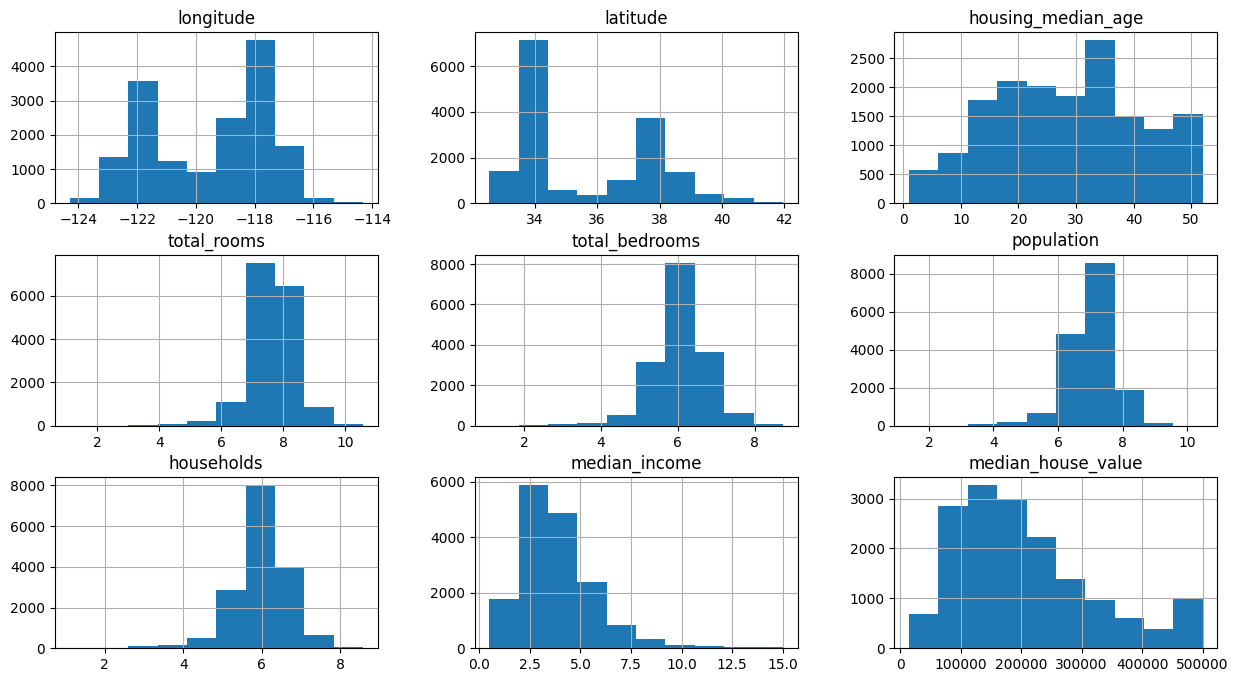

In [4]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data.hist(figsize=(15,8))

In [5]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: xlabel='latitude', ylabel='longitude'>

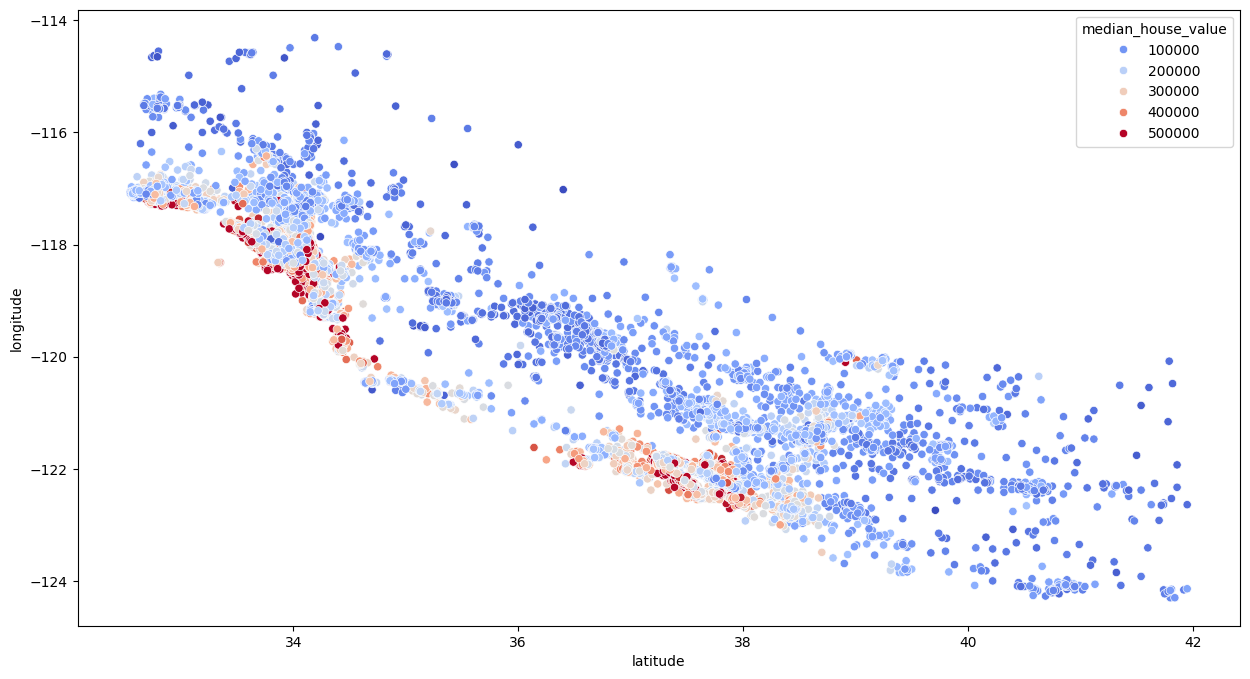

In [6]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y = "longitude", data=train_data,hue="median_house_value",palette="coolwarm" )

## Complete this code

******************** Feature Engineering ***************************

In [7]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/ train_data['households']

<Axes: >

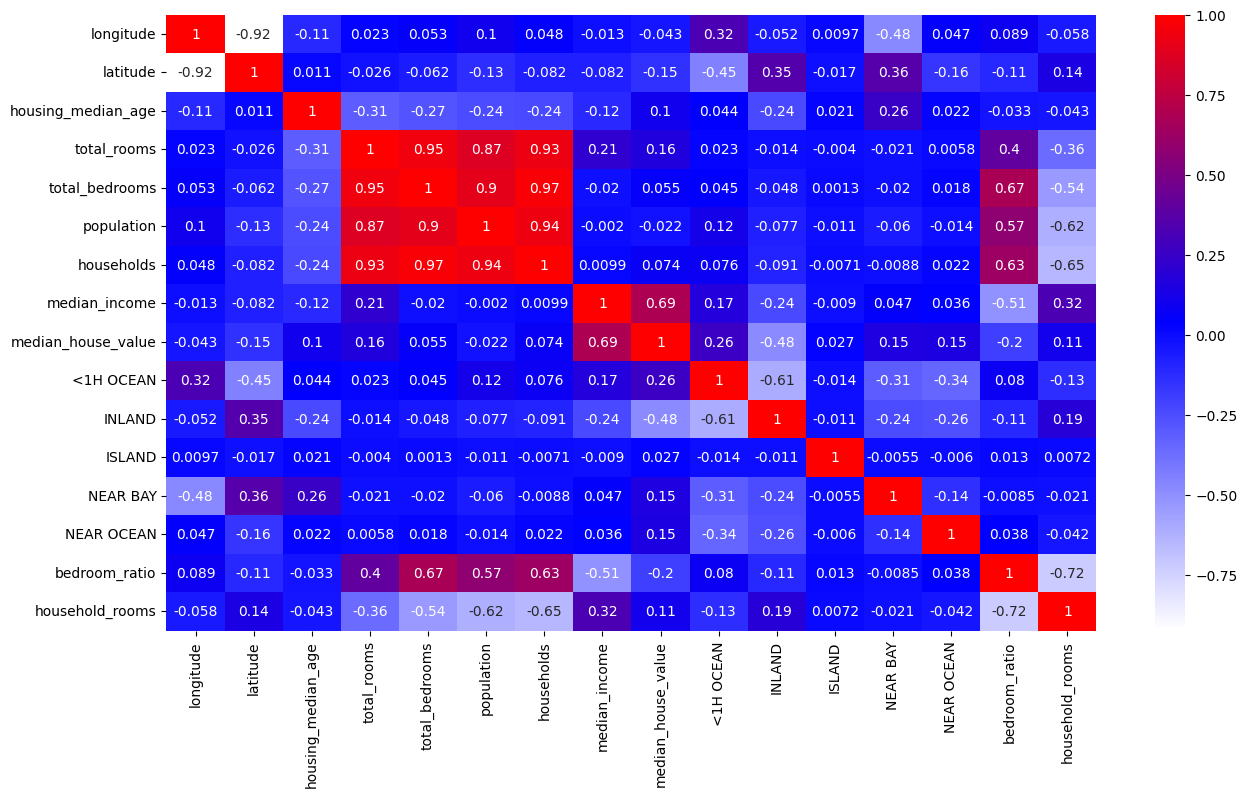

In [8]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#ffffff", "#0000ff", "#ff0000"])
plt.figure(figsize=(15,8))
#sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")
sns.heatmap(train_data.corr(), annot=True, cmap=custom_cmap)

In [9]:
highly_corr_feature_names = train_data.columns[np.abs(train_data.corr()['median_house_value']) >= 0.1].tolist()

print('Highly Correlated Features:\n', highly_corr_feature_names, '\n')
cnt = len(highly_corr_feature_names)
print('Number of Highly Correlated Features:', cnt)



Highly Correlated Features:
 ['latitude', 'housing_median_age', 'total_rooms', 'median_income', 'median_house_value', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'bedroom_ratio', 'household_rooms'] 

Number of Highly Correlated Features: 11


In [10]:
features_useful = train_data[highly_corr_feature_names]
features_useful

,latitude,housing_median_age,total_rooms,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
428,37.88,52.0,7.822445,4.1429,259600.0,False,False,True,False,0.792397,1.273591
10309,33.89,4.0,10.543709,7.4947,366300.0,True,False,False,False,0.816354,1.232535
14354,32.75,23.0,7.789869,3.1389,101800.0,False,False,False,True,0.832249,1.218706
16543,37.79,23.0,7.593878,2.7734,116800.0,False,True,False,False,0.796970,1.272828
19555,37.61,5.0,8.204125,3.4703,129300.0,False,True,False,False,0.797987,1.267263
...,...,...,...,...,...,...,...,...,...,...,...
4483,34.06,47.0,7.751475,1.1868,93800.0,True,False,False,False,0.837353,1.213337
7012,33.96,30.0,6.834109,2.6991,147100.0,True,False,False,False,0.796361,1.272495
4401,34.08,40.0,7.396949,2.7366,169100.0,True,False,False,False,0.851560,1.186098
11793,38.85,8.0,8.322394,4.4085,139400.0,False,True,False,False,0.789036,1.265749


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # evaluation metrics for regression models

In [12]:
train_data = features_useful
train_data

,latitude,housing_median_age,total_rooms,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
428,37.88,52.0,7.822445,4.1429,259600.0,False,False,True,False,0.792397,1.273591
10309,33.89,4.0,10.543709,7.4947,366300.0,True,False,False,False,0.816354,1.232535
14354,32.75,23.0,7.789869,3.1389,101800.0,False,False,False,True,0.832249,1.218706
16543,37.79,23.0,7.593878,2.7734,116800.0,False,True,False,False,0.796970,1.272828
19555,37.61,5.0,8.204125,3.4703,129300.0,False,True,False,False,0.797987,1.267263
...,...,...,...,...,...,...,...,...,...,...,...
4483,34.06,47.0,7.751475,1.1868,93800.0,True,False,False,False,0.837353,1.213337
7012,33.96,30.0,6.834109,2.6991,147100.0,True,False,False,False,0.796361,1.272495
4401,34.08,40.0,7.396949,2.7366,169100.0,True,False,False,False,0.851560,1.186098
11793,38.85,8.0,8.322394,4.4085,139400.0,False,True,False,False,0.789036,1.265749


In [13]:
X_train, y_train = train_data.drop(['median_house_value'], axis =1), train_data['median_house_value']
X_train
train_columns = X_train.columns
train_columns



Index(['latitude', 'housing_median_age', 'total_rooms', 'median_income',
       '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'bedroom_ratio',
       'household_rooms'],
      dtype='object')

In [14]:
print(f"Shape of X_train: {X_train.shape}\nShape of y_train: {y_train.shape}\nShape of X_test: {X_test.shape}\nShape of y_test: {y_test.shape}")

Shape of X_train: (16346, 10)
Shape of y_train: (16346,)
Shape of X_test: (4087, 9)
Shape of y_test: (4087,)


In [15]:
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_train.columns]

print(X_train.columns)

Index(['latitude', 'housing_median_age', 'total_rooms', 'median_income',
       '1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'bedroom_ratio',
       'household_rooms'],
      dtype='object')


******************** Training Model***************************

Linear Regression

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

###### Random Forest Regressor

In [17]:

RanF = RandomForestRegressor()
RanF.fit(X_train, y_train)


RandomForestRegressor()

Gradient Boosting Regressor

In [18]:
GradR = GradientBoostingRegressor()
GradR.fit(X_train, y_train)


GradientBoostingRegressor()

In [19]:
xgbr = XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

********* Preparing Test Data ************

In [20]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20401,-118.85,34.21,29.0,7.694393,6.028279,7.215975,5.996452,3.4773,206700.0,True,False,False,False,False,0.783464,1.283158
20040,-118.99,36.07,21.0,6.891626,5.111988,6.511745,5.135798,2.9750,63900.0,False,True,False,False,False,0.741768,1.341880
10583,-117.80,33.72,16.0,7.870166,6.228511,7.183871,6.238325,4.8210,201400.0,True,False,False,False,False,0.791408,1.261583
19550,-121.01,37.62,35.0,7.637716,6.169611,7.431300,6.068426,2.0885,73700.0,False,True,False,False,False,0.807782,1.258599
14181,-117.05,32.72,35.0,7.483244,5.913503,7.055313,5.869297,3.4107,117000.0,False,False,False,False,True,0.790233,1.274981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15594,-116.28,32.84,18.0,5.948035,4.859812,5.273000,4.248495,2.5179,58800.0,False,True,False,False,False,0.817045,1.400033
7957,-118.17,33.88,42.0,7.406103,5.918894,7.057898,5.863631,3.0893,162700.0,True,False,False,False,False,0.799191,1.263058
10450,-117.67,33.44,25.0,8.004700,6.253829,6.806829,6.018593,6.6852,500001.0,True,False,False,False,False,0.781270,1.329995
13896,-116.33,34.15,13.0,7.500529,6.021023,6.601230,5.771441,1.5489,57400.0,False,True,False,False,False,0.802746,1.299594


In [21]:

X_test, y_test = test_data.drop(['median_house_value'], axis =1), test_data['median_house_value']

# Add missing columns to test data and ensure the order is the same as training data
for col in train_columns:
    if col not in X_test.columns:
        X_test[col] = 0
X_test = X_test[train_columns]

X_test



,latitude,housing_median_age,total_rooms,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20401,34.21,29.0,7.694393,3.4773,True,False,False,False,0.783464,1.283158
20040,36.07,21.0,6.891626,2.9750,False,True,False,False,0.741768,1.341880
10583,33.72,16.0,7.870166,4.8210,True,False,False,False,0.791408,1.261583
19550,37.62,35.0,7.637716,2.0885,False,True,False,False,0.807782,1.258599
14181,32.72,35.0,7.483244,3.4107,False,False,False,True,0.790233,1.274981
...,...,...,...,...,...,...,...,...,...,...
15594,32.84,18.0,5.948035,2.5179,False,True,False,False,0.817045,1.400033
7957,33.88,42.0,7.406103,3.0893,True,False,False,False,0.799191,1.263058
10450,33.44,25.0,8.004700,6.6852,True,False,False,False,0.781270,1.329995
13896,34.15,13.0,7.500529,1.5489,False,True,False,False,0.802746,1.299594


In [22]:
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_test.columns]

print(X_test.columns)

Index(['latitude', 'housing_median_age', 'total_rooms', 'median_income',
       '1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'bedroom_ratio',
       'household_rooms'],
      dtype='object')


************ Predicting using the test data ***************

In [23]:
linear_pred = reg.predict(X_test)

r2   = r2_score(y_test, linear_pred)             #   R-squared (R²)
mae  = mean_absolute_error(y_test, linear_pred)  # Mean Absolute Error
mse  = mean_squared_error(y_test, linear_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                          # Root Mean Squared Error
print("Co-efficient of determinent is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

Co-efficient of determinent is:  0.6299832280313385
Mean Absolute Error is:  51131.05129634945
Mean Squared Error is:  4909205787.517544
Root Mean Squared Error is:  70065.72476980128


In [31]:

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': linear_pred.flatten()
})

comparison_df_sorted = comparison_df.assign(Difference=abs(comparison_df['Actual'] - comparison_df['Predicted'])).sort_values(by='Difference')


#comparison_df_sorted.drop(columns=['Difference'], inplace=True)

print(comparison_df_sorted)
# comparison_df_sorted.head()


         Actual      Predicted     Difference
12925  139000.0  138971.105700      28.894300
3377   175000.0  174967.833698      32.166302
9275   228600.0  228524.298668      75.701332
11424  286100.0  286182.260042      82.260042
19073  195500.0  195627.728331     127.728331
...         ...            ...            ...
1565   434700.0   93112.409941  341587.590059
17306  500001.0  153026.024069  346974.975931
10454  500001.0  145853.761550  354147.238450
10574  500001.0   96496.068827  403504.931173
19542  450000.0  -12082.281899  462082.281899

[4087 rows x 3 columns]


In [25]:
ran_pred = RanF.predict(X_test)


r2   = r2_score(y_test, ran_pred)             #   R-squared (R²)
mae  = mean_absolute_error(y_test, ran_pred)  # Mean Absolute Error
mse  = mean_squared_error(y_test, ran_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                          # Root Mean Squared Error
print("Co-efficient of determinent is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

Co-efficient of determinent is:  0.7413715738180215
Mean Absolute Error is:  40239.40075850257
Mean Squared Error is:  3431358421.603269
Root Mean Squared Error is:  58577.79802624258


In [32]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': ran_pred.flatten()
})


comparison_df_sorted = comparison_df.assign(Difference=abs(comparison_df['Actual'] - comparison_df['Predicted'])).sort_values(by='Difference')


#comparison_df_sorted.drop(columns=['Difference'], inplace=True)

print(comparison_df_sorted)
# comparison_df_sorted.head()

         Actual  Predicted  Difference
18360  500001.0  500001.00        0.00
4042   500001.0  500001.00        0.00
18066  500001.0  500001.00        0.00
18327  500001.0  500001.00        0.00
16909  500001.0  500001.00        0.00
...         ...        ...         ...
8859   500001.0  206839.05   293161.95
17306  500001.0  193329.01   306671.99
10574  500001.0  191235.02   308765.98
19542  450000.0  113407.00   336593.00
10454  500001.0  130496.00   369505.00

[4087 rows x 3 columns]


In [33]:
grad_pred = GradR.predict(X_test)


r2   = r2_score(y_test, grad_pred)             #  R-squared (R²)
mae  = mean_absolute_error(y_test, grad_pred)  #  Mean Absolute Error
mse  = mean_squared_error(y_test, grad_pred)   #  Mean Squared Error
rmse = np.sqrt(mse)                          # Root Mean Squared Error
print("Co-efficient of determinent is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

Co-efficient of determinent is:  0.7234027672100087
Mean Absolute Error is:  43087.14724947972
Mean Squared Error is:  3669759964.6617303
Root Mean Squared Error is:  60578.54376478301


In [34]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': grad_pred.flatten()
})


comparison_df_sorted = comparison_df.assign(Difference=abs(comparison_df['Actual'] - comparison_df['Predicted'])).sort_values(by='Difference')

#comparison_df_sorted.drop(columns=['Difference'], inplace=True)

print(comparison_df_sorted)

         Actual      Predicted     Difference
7696   291000.0  290985.035242      14.964758
8404   170000.0  170123.425205     123.425205
12002  203400.0  203271.646807     128.353193
16318  119600.0  119735.855511     135.855511
19908   84600.0   84748.747715     148.747715
...         ...            ...            ...
4548    67500.0  380506.258493  313006.258493
17306  500001.0  165200.029338  334800.970662
10574  500001.0  159165.799344  340835.200656
10454  500001.0  157903.126172  342097.873828
19542  450000.0  102728.628893  347271.371107

[4087 rows x 3 columns]


In [35]:

xgbrf_pred = xgbr.predict(X_test)


r2 = r2_score(y_test, xgbrf_pred)             # R-squared (R²)
mae = mean_absolute_error(y_test, xgbrf_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, xgbrf_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                            # Root Mean Squared Error


print("Co-efficient of determinant (R²) is: ", r2)
print("Mean Absolute Error is: ", mae)
print("Mean Squared Error is: ", mse)
print("Root Mean Squared Error is: ", rmse)

Co-efficient of determinant (R²) is:  0.6820192183596616
Mean Absolute Error is:  46595.772022953875
Mean Squared Error is:  4218817123.458159
Root Mean Squared Error is:  64952.421998399404


In [36]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': grad_pred.flatten()
})


comparison_df_sorted = comparison_df.assign(Difference=abs(comparison_df['Actual'] - comparison_df['Predicted'])).sort_values(by='Difference')

#comparison_df_sorted.drop(columns=['Difference'], inplace=True)

print(comparison_df_sorted)

         Actual      Predicted     Difference
7696   291000.0  290985.035242      14.964758
8404   170000.0  170123.425205     123.425205
12002  203400.0  203271.646807     128.353193
16318  119600.0  119735.855511     135.855511
19908   84600.0   84748.747715     148.747715
...         ...            ...            ...
4548    67500.0  380506.258493  313006.258493
17306  500001.0  165200.029338  334800.970662
10574  500001.0  159165.799344  340835.200656
10454  500001.0  157903.126172  342097.873828
19542  450000.0  102728.628893  347271.371107

[4087 rows x 3 columns]
